# Import Libraries

In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop

# Read data

In [2]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/winequality-white.csv', sep=';')

dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Data Cleaning dan EDA

In [3]:
# Cek data types
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


^ Data tidak ada yang bersifat null ataupun '?', dan tipe data tidak ada yang string

In [5]:
corr = dataset.corr()

corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


^ Seluruh data memiliki korelasi yang rendah terhadap quality baik positif maupun negatif. Yang paling besar korelasinya hanya alcohol walaupun dibawah 0.5

# Preprocessing

In [8]:
features = dataset.drop(['quality'], axis=1)
label = dataset['quality']

In [9]:
# Preprocessing menggunakan Standard Scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten() # Reshape value untuk label

In [11]:
# Split data 80:20

from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.20, random_state=10)

# Modeling

In [52]:
# Menggunakan 3 Hidden layer(256,512,1024), activation function relu dan 1x Dropout. input_dim = 1 menyesuaikan banyaknya feature yang akan digunakan untuk modeling
model = Sequential()
model.add(Dense(256, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal')) # Output layer 1 neuron karena output yang dibutuhkan antara 0-1

opt = RMSprop(lr=0.001) # Optimizer dengan RMSprop dengan learning rate 0.001

model.compile(loss='mean_squared_error', optimizer='adam') # Karena problem bersifat regresi maka menggunakan MSE sebagai loss function
model.summary()
# Batch size 8 dengan epoch 100
history = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               3072      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 1025      
Total params: 660,993
Trainable params: 660,993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
490/490 [==============================] - 3s 7ms/step - loss: 0.7567 - val_loss: 0.6535
Epoch 2/100
4

In [53]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.5315612979303364
MAE (Mean Absolute Error) 0.5314518195584615
r^2 score 0.45359017006287106
RMSE (Root Mean Squared Error 0.7290825041998583


In [55]:
# Function untuk plot history
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [56]:
# Menampilkan val_loss terkecil dengan dataframe
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
98,0.272028,0.507985,98
81,0.302562,0.512227,81
77,0.318892,0.512879,77
96,0.272802,0.517091,96
78,0.309625,0.517210,78
...,...,...,...
7,0.618305,0.631250,7
6,0.631675,0.632825,6
0,0.756688,0.653493,0
3,0.654952,0.664555,3


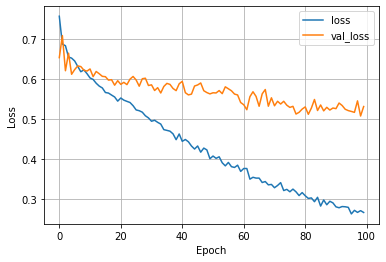

In [57]:
plot_loss(history) # epoch vs loss graph

# Kesimpulan

Validation Loss paling kecil didapatkan pada epoch 98 dengan hasil 0.507985 dan loss sebesar 0.272028. Dan hasil scoring adalah:

MSE (Mean Squared Error) 0.5315612979303364

MAE (Mean Absolute Error) 0.5314518195584615

r^2 score 0.45359017006287106

RMSE (Root Mean Squared Error 0.7290825041998583